# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [11]:
df['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)
df['flag_doente'].replace({0: 'saudavel', 1: 'doente'}, inplace=True)

C:\Users\renna\AppData\Local\Temp\ipykernel_15028\3266349094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)
C:\Users\renna\AppData\Local\Temp\ipykernel_15028\3266349094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [13]:
#Criando tabela de contingência.
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

In [15]:
# Cálculando as estatísticas.
tab_sex['media_doentes'] = tab_sex['doente'] / tab_sex['All']
tab_sex['odds_doentes'] = tab_sex['media_doentes'] / (1 - tab_sex['media_doentes'])
tab_sex['odds_ratio'] = tab_sex['odds_doentes'] / tab_sex.loc['All', 'odds_doentes']
tab_sex['logito_doentes'] = np.log(tab_sex['odds_doentes'])
tab_sex['woe'] = np.log(tab_sex['odds_ratio'])


In [17]:
tab_sex

flag_doente,doente,saudavel,All,media_doentes,odds_doentes,odds_ratio,logito_doentes,woe
sex,,,,,,,,
feminino,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
masculino,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [20]:
df['age_cat'] = pd.cut(df['age'], bins=5)

In [22]:
tab_age = pd.crosstab(df['age_cat'], df['flag_doente'], margins=True)

In [24]:
tab_age['media_doentes'] = tab_age['doente'] / tab_age['All']
tab_age['odds_doentes'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
tab_age['odds_ratio'] = tab_age['odds_doentes'] / tab_age.loc['All', 'odds_doentes']
tab_age['logito_doentes'] = np.log(tab_age['odds_doentes'])
tab_age['woe'] = np.log(tab_age['odds_ratio'])

In [26]:
mean_age = df['age'].mean()

In [28]:
tab_age

flag_doente,doente,saudavel,All,media_doentes,odds_doentes,odds_ratio,logito_doentes,woe
age_cat,,,,,,,,
"(28.952, 38.6]",3,8,11,0.272727,0.375000,0.442446,-0.980829,-0.815437
"(38.6, 48.2]",21,50,71,0.295775,0.420000,0.495540,-0.867501,-0.702108
"(48.2, 57.8]",41,56,97,0.422680,0.732143,0.863823,-0.311780,-0.146387
"(57.8, 67.4]",67,40,107,0.626168,1.675000,1.976259,0.515813,0.681206
"(67.4, 77.0]",7,10,17,0.411765,0.700000,0.825899,-0.356675,-0.191282
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [30]:
print('O valor médio da variável age é:', mean_age)

O valor médio da variável age é: 54.43894389438944


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

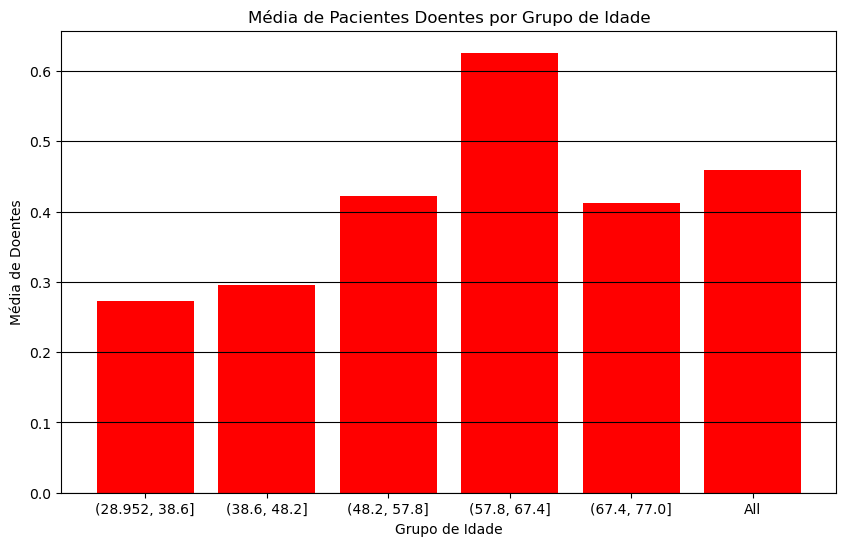

In [63]:
# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tab_age.index.astype(str), tab_age['media_doentes'], color = 'red')
plt.title('Média de Pacientes Doentes por Grupo de Idade', color='black')
plt.xlabel('Grupo de Idade', color='black')
plt.ylabel('Média de Doentes', color='black')
plt.grid(zorder=1, color='black', axis='y')

plt.show()

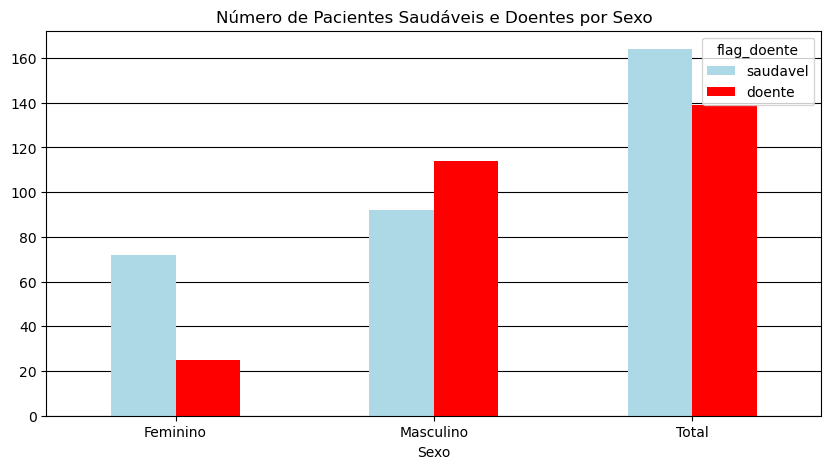

In [65]:
ax0 = tab_sex[['saudavel', 'doente']].plot.bar(rot=0, figsize=(10, 5), zorder=2, color=['lightblue', 'red'])

ax0.set_title('Número de Pacientes Saudáveis e Doentes por Sexo', color ='black')
ax0.set_xlabel('Sexo', color ='black')
ax0.set_xticklabels(['Feminino', 'Masculino', 'Total'])
ax0.grid(zorder=1, color='black', axis='y')

plt.show()

------------------